# Exercise 4: Weather Data

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/tuyenhavan/Course_Data/main/weather.csv")
df.head()

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,Cold
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,Warm
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,Normal
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,Cold
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,Cold


### Feature and Target 

In [5]:
X=df.iloc[:, 1:]
y=df["Temperature_c"]

In [6]:
# Get dummies for X
X=pd.get_dummies(X)
X.head()

,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description_Cold,Description_Normal,Description_Warm
0,0.92,11.2700,130,8.0500,1021.60,0,1,0,0
1,0.73,20.9300,330,16.1000,1017.00,1,0,0,1
2,0.97,5.9731,193,14.9086,1013.99,1,0,1,0
3,0.82,3.2200,300,16.1000,1031.59,1,1,0,0
4,0.60,10.8836,116,9.9820,1020.88,1,1,0,0


### Split data for training and testing

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=42)

#### Building a model

In [10]:
from sklearn.tree import DecisionTreeRegressor

model=DecisionTreeRegressor()

model.fit(X_train, y_train)

DecisionTreeRegressor()

In [15]:
# Check accuracy
R2train=model.score(X_train,y_train)

R2test=model.score(X_test,y_test)

print("Train accuracy is {} and Test accuracy is {}".format(R2train, R2test))

Train accuracy is 1.0 and Test accuracy is 0.7921358279441115


In [17]:
# Check MSE 
from sklearn.metrics import mean_squared_error
# Predict on test set
y_pred=model.predict(X_test)
MSE=mean_squared_error(y_test, y_pred)
print(f"MSE is {MSE}")

MSE is 18.113208493920446


The training and testing accuracies are largely different which signals overfitting. We can try standardize the X features, but it may not give positive results.

# Exercise 3: NBD Players

In [51]:
df=pd.read_csv("https://raw.githubusercontent.com/tuyenhavan/Course_Data/main/nba_2013.csv")
# Drop columns that are not used. 
df=df.drop(["player","season","season_end","bref_team_id"], axis=1)
df.head()

,pos,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,SF,23,63,0,847,66,141,0.468,4,15,...,0.660,72,144,216,28,23,26,30,122,171
1,C,20,81,20,1197,93,185,0.503,0,0,...,0.581,142,190,332,43,40,57,71,203,265
2,PF,27,53,12,961,143,275,0.520,0,0,...,0.639,102,204,306,38,24,36,39,108,362
3,SG,28,73,73,2552,464,1011,0.459,128,300,...,0.815,32,230,262,248,35,3,146,136,1330
4,C,25,56,30,951,136,249,0.546,0,1,...,0.836,94,183,277,40,23,46,63,187,328


In [52]:
# Check missing values
missing=df.isnull().sum()
# Display missing values 
missing[missing>0]

fg.      2
x3p.    67
x2p.     3
efg.     2
ft.     20
dtype: int64

In [53]:
# Mean fg.
meanfg1=df["fg."].dropna().mean()
meanx3p=df["x3p."].dropna().mean()
meanx2p=df["x2p."].dropna().mean()
meanefg=df["efg."].dropna().mean()
meanft=df["ft."].dropna().mean()

print(f"{meanfg1}\t{meanx3p}")

0.43643632567849694	0.2851111897859946


In [54]:
# Fill na values
# fg. variable
df["fg."].fillna(df["fg."].sum(axis=0, skipna=True)/len(df.fg), inplace=True)
# x2p. variable
df["x2p."].fillna(df["x2p."].sum(axis=0, skipna=True)/len(df.fg), inplace=True)
#x3p. variable
df["x3p."].fillna(df["x3p."].sum(axis=0, skipna=True)/len(df.fg), inplace=True)
#efg. variable
df["efg."].fillna(df["efg."].sum(axis=0, skipna=True)/len(df.fg), inplace=True)
# ft. variable
df["ft."].fillna(df["ft."].sum(axis=0, skipna=True)/len(df.fg), inplace=True)

In [55]:
df.head()

,pos,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,SF,23,63,0,847,66,141,0.468,4,15,...,0.660,72,144,216,28,23,26,30,122,171
1,C,20,81,20,1197,93,185,0.503,0,0,...,0.581,142,190,332,43,40,57,71,203,265
2,PF,27,53,12,961,143,275,0.520,0,0,...,0.639,102,204,306,38,24,36,39,108,362
3,SG,28,73,73,2552,464,1011,0.459,128,300,...,0.815,32,230,262,248,35,3,146,136,1330
4,C,25,56,30,951,136,249,0.546,0,1,...,0.836,94,183,277,40,23,46,63,187,328


### Feature and Target

In [56]:
X=df[['pos', 'age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa',
       'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb',
       'trb', 'ast', 'stl', 'blk', 'tov', 'pf']]
y=df["pts"]

In [57]:
# Get dummies for features
X=pd.get_dummies(X)
X.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,blk,tov,pf,pos_C,pos_F,pos_G,pos_PF,pos_PG,pos_SF,pos_SG
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,26,30,122,0,0,0,0,0,1,0
1,20,81,20,1197,93,185,0.503,0,0,0.245397,...,57,71,203,1,0,0,0,0,0,0
2,27,53,12,961,143,275,0.520,0,0,0.245397,...,36,39,108,0,0,0,1,0,0,0
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,3,146,136,0,0,0,0,0,0,1
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,46,63,187,1,0,0,0,0,0,0


### Split for training and testing

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

### Model building and validation

In [59]:
from sklearn.tree import DecisionTreeRegressor

model=DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [60]:
# Predict on X_test
y_pred=model.predict(X_test)

In [61]:
# Check R2 
R2train=model.score(X_train, y_train)
R2test=model.score(X_test, y_test)
print(f" Train accuracy is {R2train} and Test accuracy is {R2test:.3f}")

 Train accuracy is 1.0 and Test accuracy is 0.975


In [62]:
# Check MSE and MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test, y_pred)

print(f"MSE is {MSE:.2f} and MAE is {MAE:.2f}")

MSE is 5137.21 and MAE is 35.89


### Visualizing the output


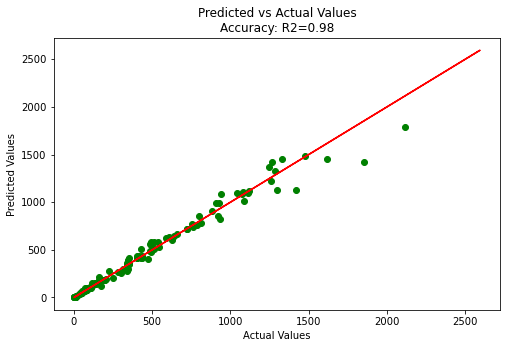

In [63]:
# Scatter plot
import matplotlib.pyplot as plt
# create a regression line

line=model.predict(X_train)

df_pred=pd.DataFrame({"Predict":y_pred, "Actual":y_test})

plt.figure(figsize=(8,5))

plt.scatter(df_pred.Actual, df_pred.Predict, color="g")
# Plot line regression
plt.plot(y_train, line, color="r")
# Adding title and labels
plt.title("Predicted vs Actual Values\nAccuracy: R2=0.98")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [71]:
# Using dist plot to visualize the fitted between predicted and actual values
import seaborn as sns
plt.figure(figzie=(8,5))
sns.distplot(y_test, hist=False, color="r", label="Test Data")
sns.distplot(y_pred, hist=False, color="g", label="Predicted Data")

TypeError: __init__() got an unexpected keyword argument 'figzie'